## 1. [Libraries and settings](#1-bullet)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")




In [3]:
df = pd.read_csv('C:/CD_C/20231/Project 1/Project/Data/MBB.csv', sep='\t', index_col=0)

In [4]:
df.head()

,Open,High,Low,Close,Volume,TradingDate,Code
0,3068.0,3068.0,2920.0,2920.0,2719290,2011-11-01,MBB
1,2878.0,2920.0,2793.0,2793.0,1255220,2011-11-02,MBB
2,2751.0,2793.0,2666.0,2772.0,1193910,2011-11-03,MBB
3,2793.0,2793.0,2729.0,2729.0,483860,2011-11-04,MBB
4,2729.0,2729.0,2602.0,2602.0,1158750,2011-11-07,MBB


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2850 entries, 0 to 2849
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Open         2850 non-null   float64
 1   High         2850 non-null   float64
 2   Low          2850 non-null   float64
 3   Close        2850 non-null   float64
 4   Volume       2850 non-null   int64  
 5   TradingDate  2850 non-null   object 
 6   Code         2850 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 178.1+ KB


In [6]:
df.describe()

,Open,High,Low,Close,Volume
count,2850.000000,2850.000000,2850.000000,2850.000000,2.850000e+03
mean,9670.182456,9791.270877,9549.658246,9664.632281,5.145129e+06
std,6724.320190,6819.385456,6618.501311,6712.067485,6.264514e+06
min,2412.000000,2498.000000,2412.000000,2452.000000,0.000000e+00
25%,4261.000000,4294.000000,4229.000000,4259.500000,7.848725e+05
50%,8158.000000,8302.000000,8076.500000,8226.000000,2.944755e+06
75%,11915.250000,12076.750000,11755.000000,11936.250000,6.925602e+06
max,28832.000000,29082.000000,28457.000000,28666.000000,5.162240e+07


In [7]:
df['TradingDate'] = pd.to_datetime(df['TradingDate'], format='%Y-%m-%d')

In [8]:
df = df.dropna()

## 2. [Visualization](#2-bullet)

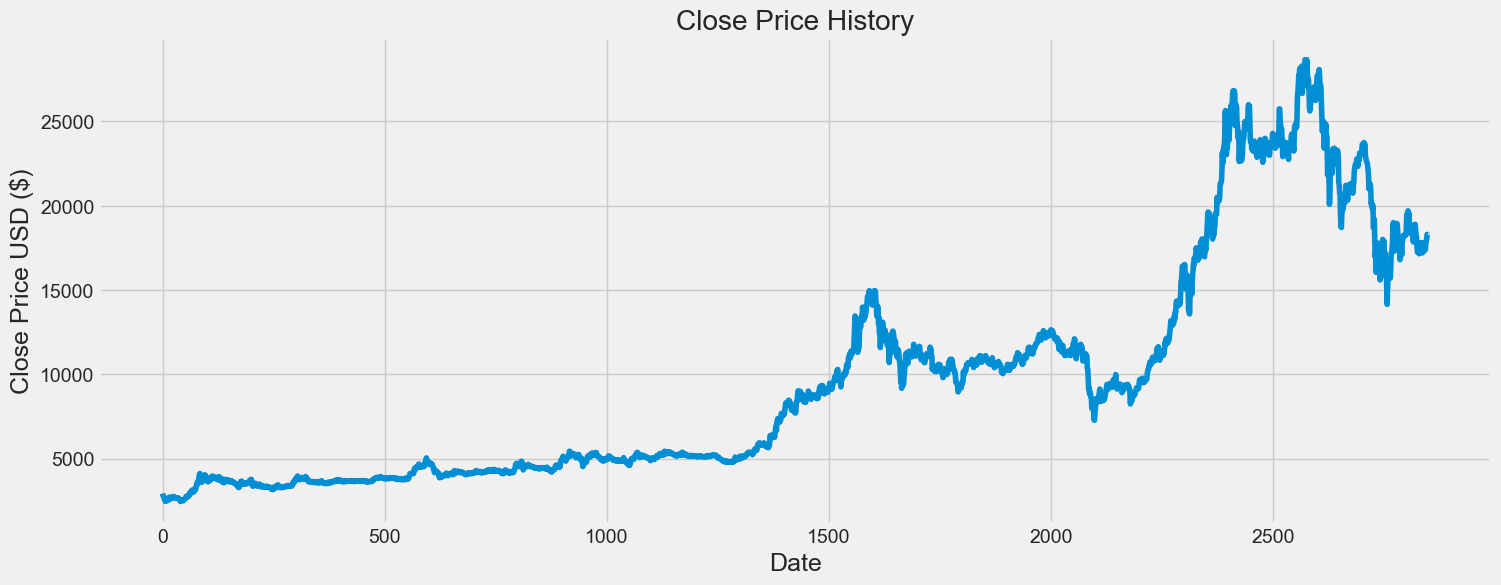

In [9]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

## 3. [Data Manipulation](#3-bullet)

In [10]:
# Create a new dataframe
data = df.filter(['Close', 'Volume'])
# Convert the dataframe to a numpy array
dataset = data.values
dataset

array([[2.9200000e+03, 2.7192900e+06],
       [2.7930000e+03, 1.2552200e+06],
       [2.7720000e+03, 1.1939100e+06],
       ...,
       [1.8300000e+04, 1.0444796e+07],
       [1.8250000e+04, 8.9824720e+06],
       [1.8250000e+04, 1.0542940e+07]])

In [11]:
dataset.shape

(2850, 2)

In [12]:
# scaler = MinMaxScaler(feature_range=(0,1))
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[-1.00502802, -0.38730302],
       [-1.02395248, -0.62105251],
       [-1.02708172, -0.6308411 ],
       ...,
       [ 1.28676941,  0.84613058],
       [ 1.27931883,  0.61265985],
       [ 1.27931883,  0.86179999]])

## 4. [Create Dataset](#4-bullet)

In [13]:
time_step = 30
def create_dataset(dataset, time_step=30):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step):
        dataX.append(dataset[i:(i+time_step), :].flatten())
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [14]:
x_for_train, y_for_train = create_dataset(scaled_data, time_step)
x_for_train.shape

(2820, 60)

In [15]:
training_size=int(len(dataset)*0.8) # dữ liệu để train chiếm 80%, dữ liệu để test chiếm 20%
test_size=len(dataset)-training_size
train_data,test_data=scaled_data[0:training_size],scaled_data[training_size:len(dataset)]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (2280, 2)
test_data:  (570, 2)


In [16]:
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

print("x_train: ", x_train.shape)
print("y_train: ", y_train.shape)
print("x_test: ", x_test.shape)
print("y_test", y_test.shape)

x_train:  (2250, 60)
y_train:  (2250,)
x_test:  (540, 60)
y_test (540,)


## 5. [Hyperparameter Tuning](#5-bullet)

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

# Tạo một mô hình SVR
svr_model = SVR()

# Định nghĩa không gian tham số để tìm kiếm
param_grid = {
    'C': [0.1, 1, 10, 100, 1000], 
    'gamma': ['scale', 'auto', 0.01, 0.001, 0.0001], 
    'kernel': ['rbf', 'sigmoid'],
    'epsilon': [0.1, 0.01, 0.001, 0.0001],
}

grid_search = GridSearchCV(estimator=svr_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)

grid_search.fit(x_train, y_train)

# In ra các tham số tốt nhất
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best score achieved: {grid_search.best_score_}")

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV] END ........C=0.1, epsilon=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ........C=0.1, epsilon=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ........C=0.1, epsilon=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ........C=0.1, epsilon=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ........C=0.1, epsilon=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ....C=0.1, epsilon=0.1, gamma=scale, kernel=sigmoid; total time=   0.1s
[CV] END ....C=0.1, epsilon=0.1, gamma=scale, kernel=sigmoid; total time=   0.1s
[CV] END ....C=0.1, epsilon=0.1, gamma=scale, kernel=sigmoid; total time=   0.1s
[CV] END ....C=0.1, epsilon=0.1, gamma=scale, kernel=sigmoid; total time=   0.1s
[CV] END ....C=0.1, epsilon=0.1, gamma=scale, kernel=sigmoid; total time=   0.1s
[CV] END .........C=0.1, epsilon=0.1, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END .........C=0.1, epsilon=0.1, gamma=a

## 6. [Train Model](#6-bullet)

In [18]:
best_svr = grid_search.best_estimator_
predictions = best_svr.predict(x_test)

In [19]:

predictions = predictions.reshape(-1,1)
predictions_train = best_svr.predict(x_train)

predictions_train = predictions_train.reshape(-1,1)

In [20]:
print(y_test.shape)
print(predictions.shape)
print(y_train.shape)
print(predictions_train.shape)

(540,)
(540, 1)
(2250,)
(2250, 1)


## 7. [Evaluate Model](#7-bullet)

In [21]:
mae_train = mean_absolute_error(y_train, predictions_train)
rmse_train = mean_squared_error(y_train, predictions_train)
r2_train = r2_score(y_train, predictions_train)

print("Train Mean Absolute Error:", mae_train)
print("Train Mean Squared Error:", rmse_train)
print("Train R-squared:", r2_train)

Train Mean Absolute Error: 0.012698860016644976
Train Mean Squared Error: 0.0004742986145569517
Train R-squared: 0.997975113723816


In [22]:
mae_test = mean_absolute_error(y_test, predictions)
rmse_test = mean_squared_error(y_test, predictions)
r2_test = r2_score(y_test, predictions)

print("Test Mean Absolute Error:", mae_test)
print("Test Mean Squared Error:", rmse_test)
print("Test R-squared:", r2_test)

Test Mean Absolute Error: 0.053775682423790945
Test Mean Squared Error: 0.005895969350115692
Test R-squared: 0.978059679328287


In [23]:
y_test = y_test.reshape(-1,1)
y_train = y_train.reshape(-1,1)

y_test_expanded = np.hstack((y_test, np.zeros((y_test.shape[0], 1))))
y_train_expanded = np.hstack((y_train, np.zeros((y_train.shape[0], 1))))

y_test = scaler.inverse_transform(y_test_expanded)[:, 0]  # Lấy chỉ cột đầu tiên
y_train = scaler.inverse_transform(y_train_expanded)[:, 0]  # Lấy chỉ cột đầu tiên


In [24]:
predictions_expanded = np.hstack((predictions, np.zeros((predictions.shape[0], 1))))
predictions_train_expanded = np.hstack((predictions_train, np.zeros((predictions_train.shape[0], 1))))

predictions = scaler.inverse_transform(predictions_expanded)[:, 0]  # Lấy chỉ cột đầu tiên
predictions_train = scaler.inverse_transform(predictions_train_expanded)[:, 0]  # Lấy chỉ cột đầu tiên



In [25]:
column_names_pred = ['Close_predict']
df_predictions = pd.DataFrame(predictions, columns=column_names_pred)

column_names_test = ['Close_test']
df_test = pd.DataFrame(y_test, columns=column_names_test)

concatenated = np.concatenate([df_predictions, df_test], axis=1)
column_names_concat = ['Close_predict', 'Close_test']
df_concatenated = pd.DataFrame(concatenated, columns = column_names_concat)

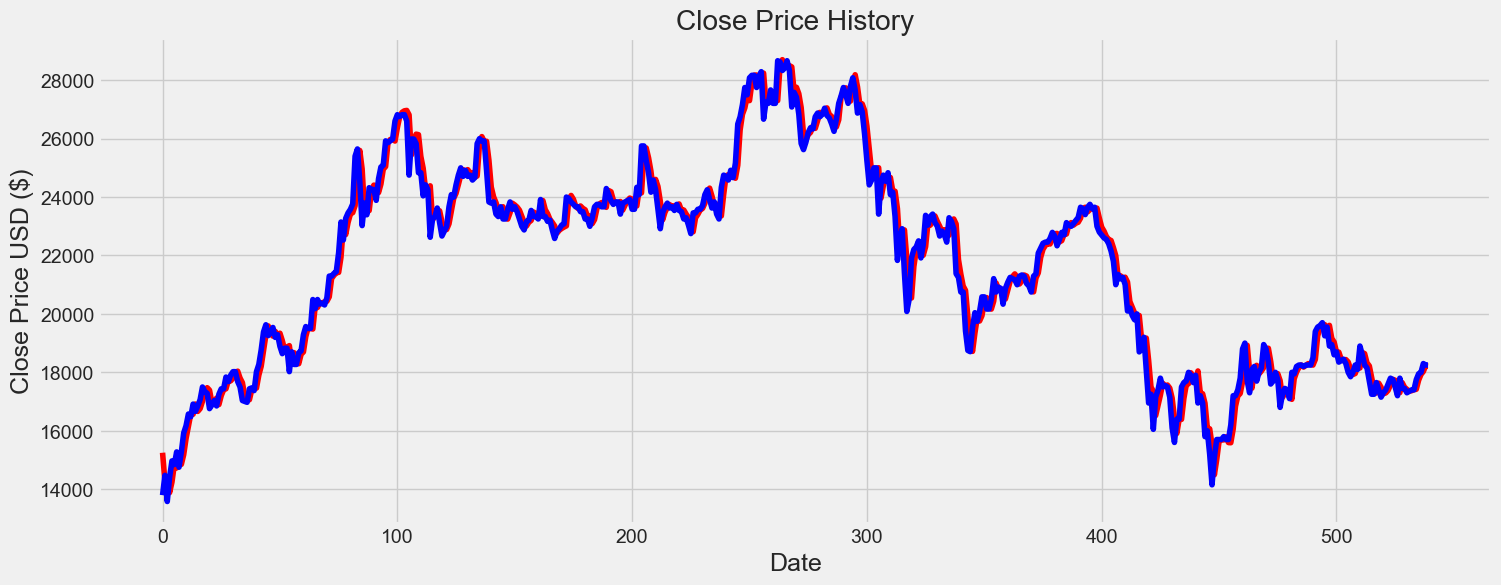

In [26]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df_predictions['Close_predict'], color='red', label='Predicted Close Price')
plt.plot(df_test['Close_test'], color='blue', label='Actual Close Price')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

## 8. [Prediction](#8-bullet)

In [27]:
last_60_days = np.array([y_test[i] for i in range(-1, -61, -1)]) # dự đoán giá của 60 ngày cuối cùng trong dataset
next_days = []  
for i in range(60):
    input_data = x_test[i-60].reshape(-1,60)
    predicted_price = best_svr.predict(input_data)
    next_days.append(predicted_price)


print("Predicted prices for the next days:")
next_days_array = np.array(next_days).reshape(-1, 1)
dummy_column = np.zeros_like(next_days_array)
next_days_two_columns = np.hstack((next_days_array, dummy_column))
next_days_inversed = scaler.inverse_transform(next_days_two_columns)
final_predictions = next_days_inversed[:, 0]

for i, price in enumerate(final_predictions):
    print(f"Day {i+1}: {price}")
    


Predicted prices for the next days:
Day 1: 17385.2262108637
Day 2: 17076.312064881306
Day 3: 17780.304306062448
Day 4: 18009.057376136407
Day 5: 18165.309442283233
Day 6: 18251.303509050354
Day 7: 18180.292353075718
Day 8: 18240.058158537886
Day 9: 18298.790237067486
Day 10: 18267.451323399255
Day 11: 18248.8132089355
Day 12: 18442.687933910478
Day 13: 19247.412642941898
Day 14: 19526.714762584437
Day 15: 19537.20757932352
Day 16: 19633.09621804767
Day 17: 19378.711496414842
Day 18: 19608.145019189862
Day 19: 19163.104793354327
Day 20: 19035.77768855915
Day 21: 18699.705314712337
Day 22: 18692.650569524492
Day 23: 18455.730213821735
Day 24: 18395.248524009327
Day 25: 18437.157259389096
Day 26: 18353.42474465772
Day 27: 18115.10112021656
Day 28: 17925.411005800455
Day 29: 17960.23477496884
Day 30: 18220.520198864673
Day 31: 18147.470929158626
Day 32: 18680.748896599984
Day 33: 18639.86811595677
Day 34: 18325.15578781585
Day 35: 18219.62544052938
Day 36: 17815.932580629975
Day 37: 17418.

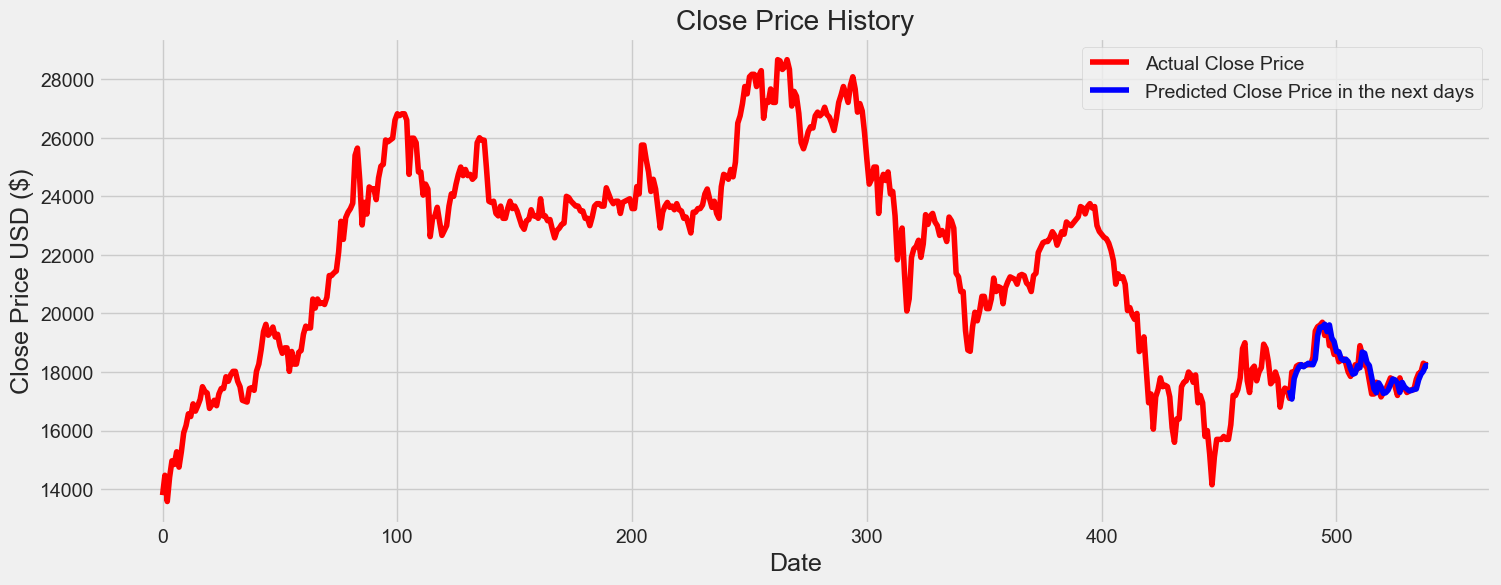

In [28]:
plt.figure(figsize=(16, 6))
plt.title('Close Price History')
plt.plot(y_test[:], color='red', label='Actual Close Price')
plt.plot(range(len(y_test)-60, len(y_test)), final_predictions, color='blue', label='Predicted Close Price in the next days')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.legend()
plt.show()